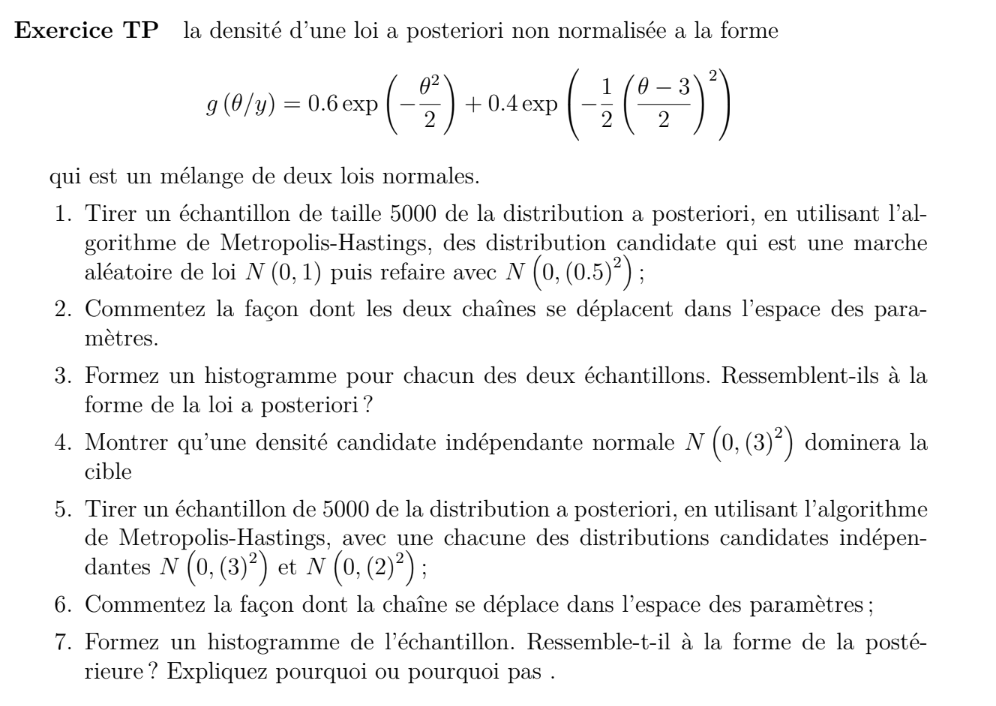

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr

In [239]:

def f(teta):
        return 0.6*np.exp(-(teta)**2/2) + 0.4*np.exp(-1/2*(((teta - 3)/2)**2))


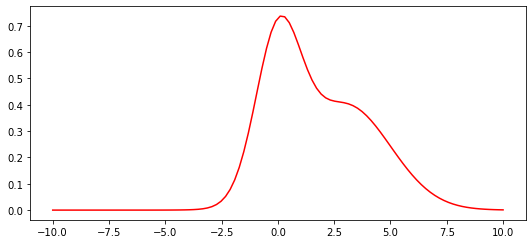

In [273]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.linspace(-10, 10, 100)

plt.plot(x, f(x), color='red')

plt.show()

In [241]:
#les échantillons acceptés ici
samples = []

#candidates
N = 5000

def exp(x):
        return np.exp(-((x)**2)/2) 



In [242]:
#N(0,1)
samples = [1]   #vide
num_accept = 0
for _ in range(N): 
    #des distribution candidate qui est une marche aléatoire d'un loi normale avec un pas de 1
    candidate = np.random.normal(samples[-1], 1)
    
    #calculer la probabilité d'accepter ce candidat
    prob = min(1, (f(candidate)*exp(samples[-1]-candidate)) / (f(samples[-1])*exp(candidate - samples[-1] )))
  
    #accepter ou pas 
    if np.random.random() < prob:
        samples.append(candidate)
        num_accept += 1
        

la façon dont la chaine se déplacent dans l'espace des parametres  : 

In [243]:
burn_in = 100  # pour arriver a la distribution stationnaire 
retained_samples = samples[burn_in+1:]

In [244]:
print("Num Samples Collecter: %s"%len(retained_samples))

Num Samples Collecter: 4129


In [245]:
print("Efficacité: %s"%round(len(retained_samples) / N, 3))

Efficacité: 0.826


In [246]:
print("Acceptations de fractions: %s"%(num_accept / N))

Acceptations de fractions: 0.8458


(-15.0, 15.0)

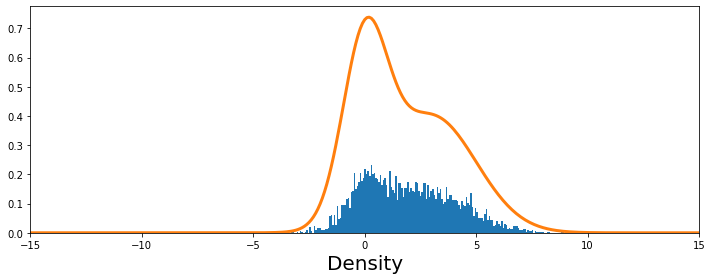

In [247]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals] 
plt.figure(figsize=(10,4))
plt.hist(retained_samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f for f in f_vals], linewidth=3)
plt.xlim(-15,15)

on vois bien que l'histogramme ressemble la forme de la loi a posteriori 

In [248]:
#N(0,(0,5)**2)
samples = []
samples = [1]   #vide
num_accept = 0
for _ in range(N):
    #distribution candidate qui est une marche aléatoire d'un loi normale avec un pas de 0.5
    candidate = np.random.normal(samples[-1], 0.25 ) 
    
    #calculer la probabilité d'accepter ce candidat
    prob = min(1, (f(candidate)*exp(samples[-1]-candidate))/ (f(samples[-1])*exp(candidate-samples[-1])))
               
    #accept ou pas
    if np.random.random() < prob:    #if "prob" was large(near 1) then most of the times np.random.random() will result in an acceptance but if "prob" was small(near 0) then most times np.random.random() will result in non-acceptance.  Basically this is how you incorporate selecting something with a probability in algorithms.
        samples.append(candidate)
        num_accept += 1
        

In [249]:
burn_in = 100  # pour arriver a la distribution stationnaire 
retained_samples = samples[burn_in+1:]

In [250]:
print("Num Samples Collecter: %s"%len(retained_samples))

Num Samples Collecter: 4664


In [251]:
print("Efficacité: %s"%round(len(retained_samples) / N, 3))

Efficacité: 0.933


In [252]:
print("Acceptations de fractions: %s"%(num_accept / N))

Acceptations de fractions: 0.9528


(-15.0, 15.0)

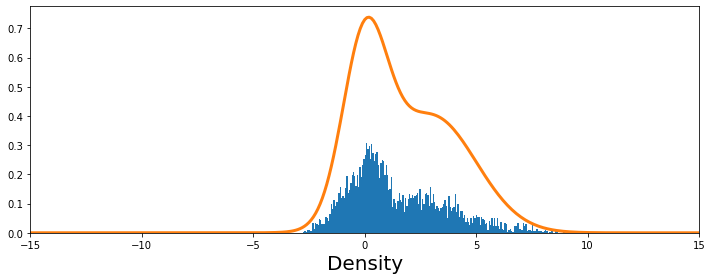

In [253]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals] 
plt.figure(figsize=(10,4))
plt.hist(retained_samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f for f in f_vals], linewidth=3)
plt.xlim(-15,15)

la répose : on vois bien que l'histogramme ressemble la forme de la loi a posteriori 

In [254]:
#qst5 : 

#N(0,(3)**2)
samples = []
samples = [1]   #vide
num_accept = 0
for _ in range(N):
    #distributions candidates indépendantes de la loi normale 
    candidate = np.random.normal(0, 9) 
    
    #calculer la probabilité d'accepter ce candidat
    prob = min(1, (f(candidate)*np.exp(-((samples[-1]/3)**2)/2))/ (f(samples[-1])*np.exp(-((candidate/3)**2)/2)))
    
    #accept ou pas 
    if np.random.random() < prob:    #if "prob" was large(near 1) then most of the times np.random.random() will result in an acceptance but if "prob" was small(near 0) then most times np.random.random() will result in non-acceptance.  Basically this is how you incorporate selecting something with a probability in algorithms.
        samples.append(candidate)
        num_accept += 1


la façon dont la chaine se déplacent dans l'espace des parametres  : 

In [255]:
burn_in = 100  # pour arriver a la distribution stationnaire 
retained_samples = samples[burn_in+1:]

In [256]:
print("Num Samples Collecter: %s"%len(retained_samples))

Num Samples Collecter: 1845


In [257]:
print("Efficacité: %s"%round(len(retained_samples) / N, 3))

Efficacité: 0.369


In [258]:
print("Acceptations de fractions: %s"%(num_accept / N))

Acceptations de fractions: 0.389


(-15.0, 15.0)

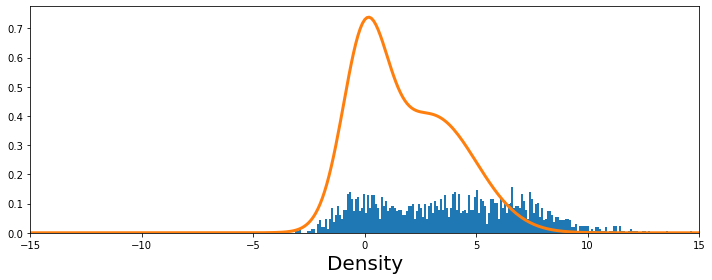

In [259]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals] 
plt.figure(figsize=(10,4))
plt.hist(retained_samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f for f in f_vals], linewidth=3)
plt.xlim(-15,15)

In [267]:
#qst5 : 
#N(0,(2)**2)
samples = []
samples = [1]   #vide
num_accept = 0
for _ in range(N):
    #distributions candidates indépendantes de la loi normale 
    candidate = np.random.normal(0, 4) 
    
    #calculer la probabilité d'accepter ce candidat
    prob = min(1, (f(candidate)*np.exp(-((samples[-1]/2)**2)/2))/ (f(samples[-1])*np.exp(-((candidate/2)**2)/2)))
    
    #accept ou pas 
    if np.random.random() < prob:    #if "prob" was large(near 1) then most of the times np.random.random() will result in an acceptance but if "prob" was small(near 0) then most times np.random.random() will result in non-acceptance.  Basically this is how you incorporate selecting something with a probability in algorithms.
        samples.append(candidate)
        num_accept += 1


la façon dont la chaine se déplacent dans l'espace des parametres  : 

In [268]:
burn_in = 100   # pour arriver a la distribution stationnaire 
retained_samples = samples[burn_in+1:]

In [269]:
print("Num Samples Collecter: %s"%len(retained_samples))

Num Samples Collecter: 219


In [270]:
print("Efficacité: %s"%round(len(retained_samples) / N, 3))

Efficacité: 0.044


In [271]:
print("Acceptations de fractions: %s"%(num_accept / N))

Acceptations de fractions: 0.0638


(-15.0, 15.0)

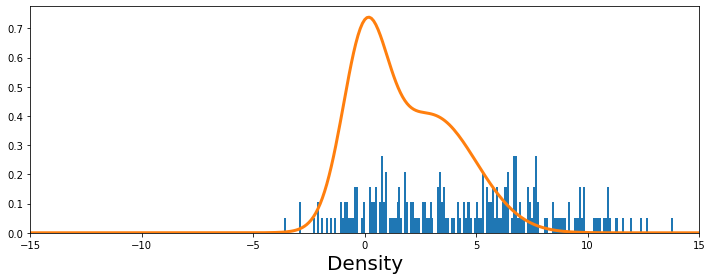

In [272]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals] 
plt.figure(figsize=(10,4))
plt.hist(retained_samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f for f in f_vals], linewidth=3)
plt.xlim(-15,15)

la répose :  les histogrammes ne ressemble pas la forme de la postérieure 
 parce que : 
  1-les candidates sont indépendates.
  2-et la taille de pas est grand.